# Projeto Final: Banco de dados
## Turma #970 - LM Tech Data Talents

Alunos: Pedro Marques, Renato Inomata

### Iniciando a Pokédex!

Importando a database e explorando os dados.

In [1]:
import pandas as pd
import pandasql as ps

pokedex_completa = pd.read_csv('Pokemon Database.csv')

In [2]:
# Dataset
pokedex_completa

,Pokemon Id,Pokedex Number,Pokemon Name,Classification,Alternate Form Name,Original Pokemon ID,Legendary Type,Pokemon Height,Pokemon Weight,Primary Type,...,Speed EV,EV Yield Total,Catch Rate,Experience Growth,Experience Growth Total,Primary Egg Group,Secondary Egg Group,Egg Cycle Count,Pre-Evolution Pokemon Id,Evolution Details
0,1,1,"""Bulbasaur""","""Seed Pokémon""",NaN,NaN,NaN,0.7,6.9,"""Grass""",...,0,1,45,"""Medium Slow""",1059860,"""Monster""","""Grass""",20,NaN,NaN
1,2,2,"""Ivysaur""","""Seed Pokémon""",NaN,NaN,NaN,1.0,13.0,"""Grass""",...,0,2,45,"""Medium Slow""",1059860,"""Monster""","""Grass""",20,1.0,"""Level 16"""
2,3,3,"""Venusaur""","""Seed Pokémon""",NaN,NaN,NaN,2.0,100.0,"""Grass""",...,0,3,45,"""Medium Slow""",1059860,"""Monster""","""Grass""",20,2.0,"""Level 32"""
3,4,3,"""Venusaur""","""Seed Pokémon""","""Mega""",3.0,NaN,2.4,155.5,"""Grass""",...,0,3,45,"""Medium Slow""",1059860,"""Monster""","""Grass""",20,NaN,NaN
4,1526,3,"""Venusaur""","""Seed Pokémon""","""Gigantamax""",3.0,NaN,24.0,0.0,"""Grass""",...,0,3,45,"""Medium Slow""",1059860,"""Monster""","""Grass""",20,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1685,1004,"""Chi-Yu""","""Ruinous Pokémon""",NaN,NaN,"""Sub-Legendary""",0.4,4.9,"""Dark""",...,0,3,6,"""Slow""",1250000,"""No Eggs Discovered""",NaN,50,NaN,NaN
1231,1742,1005,"""Roaring Moon""","""Paradox Pokémon""",NaN,NaN,NaN,2.0,380.0,"""Dragon""",...,0,3,10,"""Slow""",1250000,"""No Eggs Discovered""",NaN,50,NaN,NaN
1232,1749,1006,"""Iron Valiant""","""Paradox Pokémon""",NaN,NaN,NaN,1.4,35.0,"""Fairy""",...,0,3,10,"""Slow""",1250000,"""No Eggs Discovered""",NaN,50,NaN,NaN
1233,1647,1007,"""Koraidon""","""Paradox Pokémon""",NaN,NaN,"""Legendary""",2.5,303.0,"""Fighting""",...,0,3,3,"""Slow""",1250000,"""No Eggs Discovered""",NaN,0,NaN,NaN


In [3]:
# Lista de colunas do dataset:

list(pokedex_completa)

['Pokemon Id',
 'Pokedex Number',
 'Pokemon Name',
 'Classification',
 'Alternate Form Name',
 'Original Pokemon ID',
 'Legendary Type',
 'Pokemon Height',
 'Pokemon Weight',
 'Primary Type',
 'Secondary Type',
 'Primary Ability',
 'Primary Ability Description',
 'Secondary Ability',
 'Secondary Ability Description',
 'Hidden Ability',
 'Hidden Ability Description',
 'Special Event Ability',
 'Special Event Ability Description',
 'Male Ratio',
 'Female Ratio',
 'Base Happiness',
 'Game(s) of Origin',
 'Health Stat',
 'Attack Stat',
 'Defense Stat',
 'Special Attack Stat',
 'Special Defense Stat',
 'Speed Stat',
 'Base Stat Total',
 'Health EV',
 'Attack EV',
 'Defense EV',
 'Special Attack EV',
 'Special Defense EV',
 'Speed EV',
 'EV Yield Total',
 'Catch Rate',
 'Experience Growth',
 'Experience Growth Total',
 'Primary Egg Group',
 'Secondary Egg Group',
 'Egg Cycle Count',
 'Pre-Evolution Pokemon Id',
 'Evolution Details']

Como a database têm várias informações, optamos por resumi-las em uma tabela menor.

Além disso, aproveitamos para tratar os nomes que estavam com aspas e retirar os espaços nos nomes das colunas.

In [4]:
query = """
SELECT 
    [Pokemon Id] AS pokemon_id,
    [Pokedex Number] AS pokedex_num,
    REPLACE([Pokemon Name], '"', '') AS pokemon_name,
    REPLACE([Alternate Form Name], '"', '') AS alt_form,
    [Original Pokemon ID] AS orig_pokemon_id,
    REPLACE([Legendary Type], '"', '') AS legendary,
    [Pokemon Height] AS height,
    [Pokemon Weight] AS weight,
    REPLACE([Primary Type], '"', '') AS primary_type,
    REPLACE([Secondary Type], '"', '') AS secondary_type,
    [Male Ratio] AS male_ratio,
    [Female Ratio] AS female_ratio,
    [Health Stat] AS hp,
    [Attack Stat] AS atk,
    [Defense Stat] AS def,
    [Special Attack Stat] AS spa,
    [Special Defense Stat] AS spd,
    [Speed Stat] AS spe,
    [Base Stat Total] AS bst
FROM 
    pokedex_completa
;
"""

pokedex_resumo = ps.sqldf(query)
pokedex_resumo


,pokemon_id,pokedex_num,pokemon_name,alt_form,orig_pokemon_id,legendary,height,weight,primary_type,secondary_type,male_ratio,female_ratio,hp,atk,def,spa,spd,spe,bst
0,1,1,Bulbasaur,None,NaN,None,0.7,6.9,Grass,Poison,87.5,12.5,45,49,49,65,65,45,318
1,2,2,Ivysaur,None,NaN,None,1.0,13.0,Grass,Poison,87.5,12.5,60,62,63,80,80,60,405
2,3,3,Venusaur,None,NaN,None,2.0,100.0,Grass,Poison,87.5,12.5,80,82,83,100,100,80,525
3,4,3,Venusaur,Mega,3.0,None,2.4,155.5,Grass,Poison,87.5,12.5,80,100,123,122,120,80,625
4,1526,3,Venusaur,Gigantamax,3.0,None,24.0,0.0,Grass,Poison,87.5,12.5,80,82,83,100,100,80,525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1685,1004,Chi-Yu,None,NaN,Sub-Legendary,0.4,4.9,Dark,Fire,0.0,0.0,55,80,80,135,120,100,570
1231,1742,1005,Roaring Moon,None,NaN,None,2.0,380.0,Dragon,Dark,0.0,0.0,105,139,71,55,101,119,590
1232,1749,1006,Iron Valiant,None,NaN,None,1.4,35.0,Fairy,Fighting,0.0,0.0,74,130,90,120,60,116,590
1233,1647,1007,Koraidon,None,NaN,Legendary,2.5,303.0,Fighting,Dragon,0.0,0.0,100,135,115,85,100,135,670


* `pokemon_id` é a chave primária da tabela;

* `pokedex_num` é o número do Pokémon na Pokédex;

* `pokemon_name` é uma string com o nome do Pokémon;

* `alt_form` indica se o Pokémon em questão está em alguma forma alternativa;

* `orig_pokemon_id` referencia o Pokémon na forma base através de `pokemon_id`;

* `legendary` indica se o Pokémon é um lendário;

* `height` é a altura em metros;

* `weight` é a massa em quilos;

* `primary_type` e `secondary_type` são os tipos primários e secundários de cada Pokémon;

* `male_ratio` e `female_ratio` indicam os percentuais do gênero do Pokémon;

* `hp` é o atributo que determina os _hit points_ ou pontos de vida do Pokémon;

* `atk` é o atributo que determina o dano físico do Pokémon;

* `def` é o atributo que determina a defesa física do Pokémon; 

* `spa` é o atributo que determina o dano especial do Pokémon;

* `spd` é o atributo que determina a defesa especial do Pokémon;

* `spe` é o atributo que determina a velocidade do Pokémon;

* `bst` são os _base stats totals_, ou seja, a soma dos seis atributos anteriores.


### Tratamento dos dados

Vamos verificar se temos linhas repetidas. 

Podemos gerar uma contagem para cada `pokemon_id` e então verificar se a contagem foi maior que 1.

In [35]:
query = """
SELECT pokemon_id, COUNT(*) AS count
FROM pokedex_resumo
GROUP BY pokemon_id
HAVING count > 1
ORDER BY count DESC
;
"""
ps.sqldf(query)


,pokemon_id,count
0,139,3
1,137,3
2,90,3
3,1353,2
4,1322,2
5,1321,2
6,1287,2
7,1266,2
8,1263,2
9,1129,2


Temos dados duplicados. Vamos removê-los usando `SELECT DISTINCT`.

In [36]:
query = """
SELECT DISTINCT *
FROM pokedex_resumo
;
"""
pokedex = ps.sqldf(query)
pokedex

,pokemon_id,pokedex_num,pokemon_name,alt_form,orig_pokemon_id,legendary,height,weight,primary_type,secondary_type,male_ratio,female_ratio,hp,atk,def,spa,spd,spe,bst
0,1,1,Bulbasaur,None,NaN,None,0.7,6.9,Grass,Poison,87.5,12.5,45,49,49,65,65,45,318
1,2,2,Ivysaur,None,NaN,None,1.0,13.0,Grass,Poison,87.5,12.5,60,62,63,80,80,60,405
2,3,3,Venusaur,None,NaN,None,2.0,100.0,Grass,Poison,87.5,12.5,80,82,83,100,100,80,525
3,4,3,Venusaur,Mega,3.0,None,2.4,155.5,Grass,Poison,87.5,12.5,80,100,123,122,120,80,625
4,1526,3,Venusaur,Gigantamax,3.0,None,24.0,0.0,Grass,Poison,87.5,12.5,80,82,83,100,100,80,525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,1685,1004,Chi-Yu,None,NaN,Sub-Legendary,0.4,4.9,Dark,Fire,0.0,0.0,55,80,80,135,120,100,570
1209,1742,1005,Roaring Moon,None,NaN,None,2.0,380.0,Dragon,Dark,0.0,0.0,105,139,71,55,101,119,590
1210,1749,1006,Iron Valiant,None,NaN,None,1.4,35.0,Fairy,Fighting,0.0,0.0,74,130,90,120,60,116,590
1211,1647,1007,Koraidon,None,NaN,Legendary,2.5,303.0,Fighting,Dragon,0.0,0.0,100,135,115,85,100,135,670


### Análise prévia dos dados

#### Valores nulos


Parece que algumas colunas tem valores nulos. Quais são e quantas são?

In [39]:
# Quais os nulos do dataset?

query = """
SELECT
    COUNT(*) - COUNT(alt_form) AS count_alt_form,
    COUNT(*) - COUNT(orig_pokemon_id) AS count_orig_pokemon_id,
    COUNT(*) - COUNT(legendary) AS count_legendary,
    COUNT(*) - COUNT(secondary_type) AS count_secondary_type
FROM pokedex
;
"""

ps.sqldf(query)


,count_alt_form,count_orig_pokemon_id,count_legendary,count_secondary_type
0,1008,1008,1078,555


#### Colunas categóricas
Sobre as colunas categóricas, quais informações temos de cada?

##### Lendários

In [40]:
# Quais os tipos de lendários?

query = """
SELECT DISTINCT legendary
FROM pokedex
;
"""

ps.sqldf(query)

,legendary
0,None
1,Sub-Legendary
2,Legendary
3,Mythical


"Pokémons lendários são extremamente raros e poderosos, geralmente envolvendo mitos e lendas do mundo Pokémon".

Neste dataset eles estão divididos em 3 categorias, `Legendary`, `Mythical` e `Sub-Legendary`

In [41]:
# Quais os lendários da primeira geração?

query = """
SELECT pokemon_name, legendary
FROM pokedex
WHERE 
    pokedex_num <= 151 AND 
    legendary IS NOT NULL AND
    alt_form IS NULL
;
"""

ps.sqldf(query)

,pokemon_name,legendary
0,Articuno,Sub-Legendary
1,Zapdos,Sub-Legendary
2,Moltres,Sub-Legendary
3,Mewtwo,Legendary
4,Mew,Mythical


1. Sub-Legendary

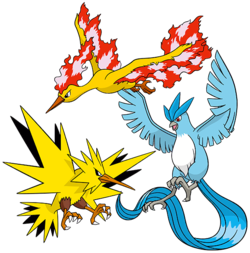

2. Legendary

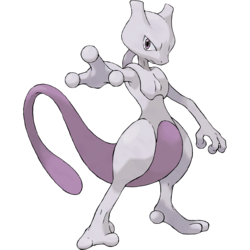

3. Mythical

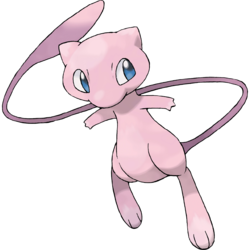


##### Formas alternativas

Alguns Pokémons possuem variações especiais porém seu número na Pokédex continua o mesmo.

A coluna `alt_form` indica se o Pokémon está em sua forma alternativa ou na sua forma base (caso o valor seja `NULL`).

In [42]:
# Quais os tipos de formas alternativas?

query = """
SELECT DISTINCT alt_form
FROM pokedex
;
"""

ps.sqldf(query)

,alt_form
0,None
1,Mega
2,Gigantamax
3,Mega X
4,Mega Y
...,...
62,Blue Plumage
63,Yellow Plumage
64,White Plumage
65,Hero


* Mega Evolutions

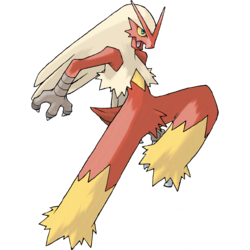 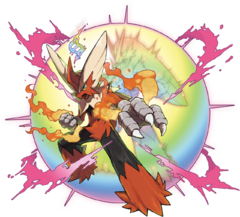

* Alolan Form

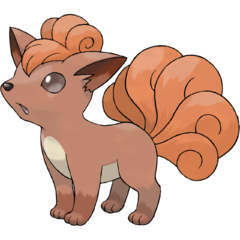 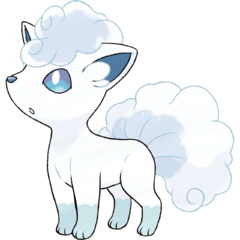

* Gigantamax

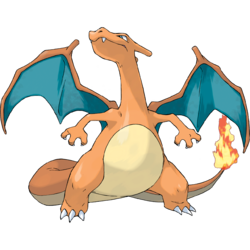 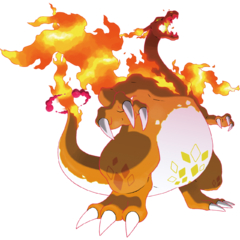

* Galarian Form

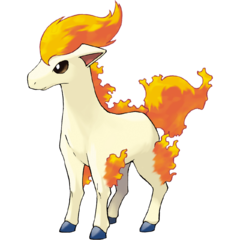 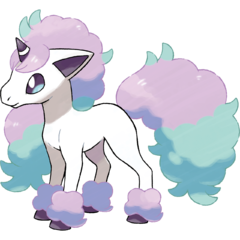

* Hisuian Form

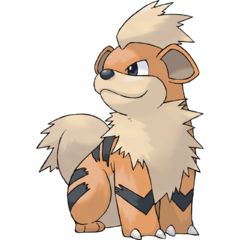 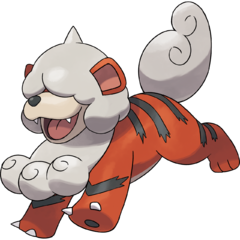


##### Tipos dos Pokémons

Os Tipos são os "elementos" dos Pokémons. 

Cada Pokémon pode ter um ou dois tipos, representados neste dataset como `primary_type` e `secondary_type`.

In [43]:
query = """
SELECT DISTINCT primary_type
FROM pokedex
;
"""

ps.sqldf(query)

,primary_type
0,Grass
1,Fire
2,Water
3,Bug
4,Normal
5,Dark
6,Poison
7,Electric
8,Ground
9,Ice


No momento existem 18 tipos diferentes e suas diversas combinações.

### Perguntas sobre o dataset:


#### 1. Quais os tipos e combinações de tipos mais frequentes?

In [44]:
query = """

WITH subquery AS(
    SELECT 
        CASE 
            WHEN secondary_type IS NULL THEN primary_type
            WHEN primary_type < secondary_type THEN primary_type || '/' || secondary_type 
            ELSE secondary_type || '/' || primary_type END AS type
    FROM pokedex
    WHERE alt_form IS NULL
    )

SELECT type, COUNT(*) AS count
FROM subquery
GROUP BY type
ORDER BY count DESC
LIMIT 20
"""
ps.sqldf(query)

,type,count
0,Water,74
1,Normal,74
2,Grass,46
3,Psychic,39
4,Fire,36
5,Electric,35
6,Fighting,28
7,Flying/Normal,27
8,Bug,23
9,Fairy,21


Parece que a maioria dos Pokémons apresentam um tipo único.

Vamos selecionar apenas os Pokémons com dois tipos e verificar quais são as combinações mais comuns:

In [61]:
query = """

WITH subquery AS(
    SELECT 
        CASE 
            -- Quando o pokémon não tem tipo secundário, utilizar apenas o tipo primário
            WHEN secondary_type IS NULL THEN primary_type 

            -- Quando o tipo primário for alfabeticamente menor que o secundário, retornar primário/secundário
            WHEN primary_type < secondary_type THEN primary_type || '/' || secondary_type  

            -- Caso o secundário seja menor, retornar secundário/primário
            ELSE secondary_type || '/' || primary_type 

        END AS type
    FROM pokedex
    WHERE alt_form IS NULL AND secondary_type IS NOT NULL
    )

SELECT type, COUNT(*) AS count
FROM subquery
GROUP BY type
ORDER BY count DESC
LIMIT 20
"""
ps.sqldf(query)

,type,count
0,Flying/Normal,27
1,Grass/Poison,14
2,Bug/Flying,13
3,Bug/Poison,12
4,Rock/Water,11
5,Ground/Water,9
6,Ground/Rock,9
7,Ice/Water,8
8,Ghost/Grass,8
9,Flying/Water,8


> Na tabela acima os Pokémons são contados indiferentemente da ordem dos tipos primários e secundários.

#### 2. Quais as combinações de tipos que ainda não existem?

Para resolver essa pergunta, criamos uma tabela auxiliar com todas as combinações possíveis de tipos.

Depois geramos outra tabela com os tipos de cada pokémon no mesmo formato.

Por fim, comparamos se a primeira tabela não estava dentro dos elementos da segunda.

In [68]:
query = """

-- Obter os diferentes tipos:
WITH types AS (
    SELECT DISTINCT primary_type AS type
    FROM pokedex
    )

-- Gerando as combinações separadas por '/' e selecionando apenas os valores distintos:
SELECT DISTINCT
    CASE
        -- Retornar somente um tipo se os dois forem iguais:
        WHEN t1.type = t2.type THEN t1.type 
        -- Juntar os tipos por ordem alfabética para evitar valores duplicados:
        -- ex: Normal/Flying e Flying/Normal são agrupados em Flying/Normal
        WHEN t1.type < t2.type THEN t1.type || '/' || t2.type 
        ELSE t2.type || '/' || t1.type
    END type_combo
FROM types AS t1
CROSS JOIN types AS t2
ORDER BY type_combo

"""

type_combos = ps.sqldf(query)
type_combos

# (18 tipos x 17 tipos / 2) + 18 tipos únicos = 171 combinações

,type_combo
0,Bug
1,Bug/Dark
2,Bug/Dragon
3,Bug/Electric
4,Bug/Fairy
...,...
166,Rock/Steel
167,Rock/Water
168,Steel
169,Steel/Water


In [71]:
query = """
SELECT 
    CASE
        WHEN secondary_type IS NULL THEN primary_type
        WHEN primary_type < secondary_type THEN primary_type || '/' || secondary_type
        ELSE secondary_type || '/' || primary_type
    END as type_combo
FROM pokedex

"""

pokemon_types = ps.sqldf(query)
pokemon_types

,type_combo
0,Grass/Poison
1,Grass/Poison
2,Grass/Poison
3,Grass/Poison
4,Grass/Poison
...,...
1208,Dark/Fire
1209,Dark/Dragon
1210,Fairy/Fighting
1211,Dragon/Fighting


In [72]:
query = """
SELECT t.type_combo
FROM type_combos AS t
WHERE t.type_combo NOT IN (
    SELECT p.type_combo
    FROM pokemon_types AS p)
"""

ps.sqldf(query)

,type_combo
0,Bug/Dragon
1,Bug/Normal
2,Fairy/Fire
3,Fairy/Ground
4,Ghost/Rock
5,Ice/Normal
6,Ice/Poison
7,Normal/Rock
8,Normal/Steel


Foram 9 combinações que ainda não existem!

#### 3. Quantas formas alternativas existem e quais as mais comuns?

In [46]:
query = """
SELECT alt_form, COUNT(*) AS count
FROM pokedex
GROUP BY alt_form
ORDER BY count DESC
LIMIT 10
;
"""

ps.sqldf(query)

,alt_form,count
0,None,1008
1,Mega,44
2,Gigantamax,32
3,Galar,19
4,Alola,18
5,Hisui,16
6,Therian,4
7,Female,4
8,Origin,3
9,Trash,2


#### 4. Quantos pokémons são lendários?

In [47]:
query = """
SELECT legendary, COUNT(*) AS count
FROM pokedex
WHERE legendary IS NOT NULL
GROUP BY legendary
ORDER BY count DESC
;
"""

ps.sqldf(query)

,legendary,count
0,Sub-Legendary,61
1,Legendary,44
2,Mythical,30


#### 5. Quais os pokémons mais altos?

In [48]:
query = """
SELECT 
    pokemon_name,
    legendary,
    alt_form,
    height,
    weight
FROM pokedex
ORDER BY height DESC
LIMIT 10
"""

ps.sqldf(query)


,pokemon_name,legendary,alt_form,height,weight
0,Eternatus,Legendary,Eternamax,100.0,0.0
1,Centiskorch,None,Gigantamax,75.0,0.0
2,Duraludon,None,Gigantamax,43.0,0.0
3,Coalossal,None,Gigantamax,42.0,0.0
4,Inteleon,None,Gigantamax,40.0,0.0
5,Snorlax,None,Gigantamax,35.0,0.0
6,Meowth,None,Gigantamax,33.0,0.0
7,Grimmsnarl,None,Gigantamax,32.0,0.0
8,Alcremie,None,Gigantamax,30.0,0.0
9,Urshifu,Sub-Legendary,Gigantamax,29.0,0.0


Os maiores Pokémons são justamente as formas Gigantamax, vamos verificar os dados sem considerá-los:

In [49]:
query = """
SELECT 
    pokemon_name,
    legendary,
    alt_form,
    height,
    weight
FROM pokedex
WHERE alt_form IS NULL
ORDER BY height DESC
LIMIT 5
"""

ps.sqldf(query)


,pokemon_name,legendary,alt_form,height,weight
0,Eternatus,Legendary,None,20.0,950.0
1,Wailord,None,None,14.5,398.0
2,Dondozo,None,None,12.0,220.0
3,Steelix,None,None,9.2,400.0
4,Celesteela,Sub-Legendary,None,9.2,999.9


1. Eternatus

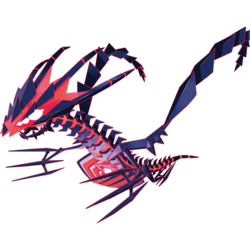

2. Wailord

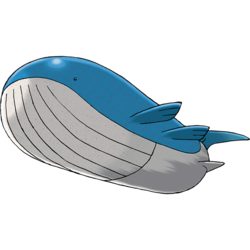

3. Dondozo

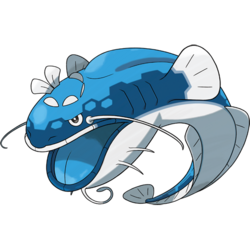

4. Steelix

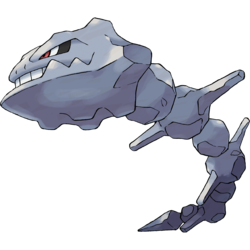

5. Celesteela

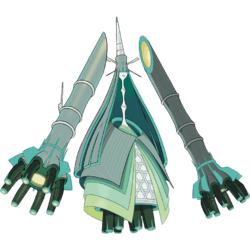

#### 6. Quais os Pokémons mais pesados?

Vamos nos limitar apenas as formas bases e aos não-lendários.

In [50]:
query = """
SELECT 
    pokemon_name,
    height,
    weight
FROM 
    pokedex
WHERE
    alt_form IS NULL AND
    legendary IS NULL
ORDER BY 
    weight DESC
LIMIT 5
;
"""

ps.sqldf(query)


,pokemon_name,height,weight
0,Mudsdale,2.5,920.0
1,Cetitan,4.5,700.0
2,Copperajah,3.0,650.0
3,Metagross,1.6,550.0
4,Stonjourner,2.5,520.0


1. Mudsdale

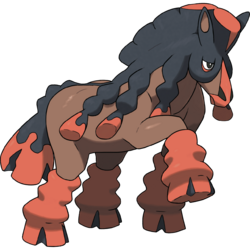

2. Cetitan

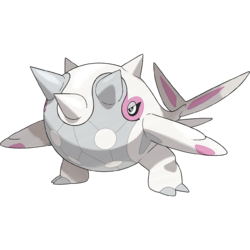

3. Copperajah

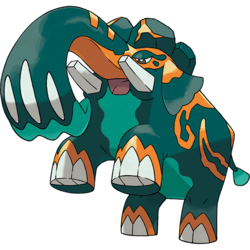

4. Metagross

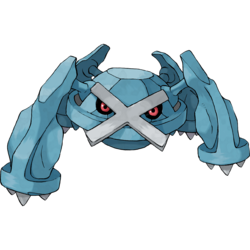

5. Stonjourner

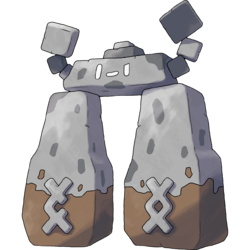

#### 7. Quais os Pokémons com maiores IMCs?

In [51]:
query = """
SELECT
    pokemon_name,
    alt_form,
    legendary,
    weight,
    height,
    ROUND(weight / (height * height), 1) AS IMC
FROM pokedex
WHERE alt_form IS NULL
ORDER BY IMC DESC
LIMIT 5
"""

ps.sqldf(query)

,pokemon_name,alt_form,legendary,weight,height,IMC
0,Cosmoem,None,Legendary,999.9,0.1,99990.0
1,Minior,None,None,40.0,0.3,444.4
2,Aron,None,None,60.0,0.4,375.0
3,Durant,None,None,33.0,0.3,366.7
4,Clamperl,None,None,52.5,0.4,328.1


1. Cosmoem

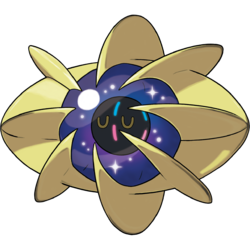

2. Minior

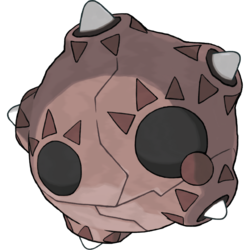

3. Aron

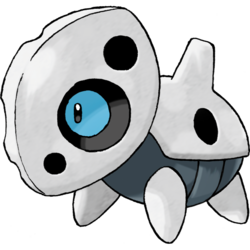

4. Durant

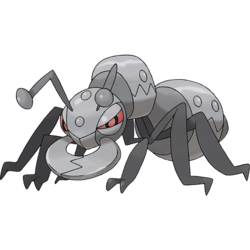

5. Clamperl

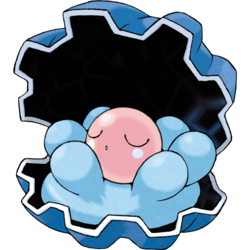

Hmm... Parece que esses Pokémons tiveram os maiores IMCs porque suas alturas eram baixas. 

Vamos verificar de novo, porém desta vez restringindo para apenas os Pokémons com mais de 1m de altura.

In [52]:
query = """
SELECT
    pokemon_name,
    alt_form,
    legendary,
    primary_type,
    secondary_type,
    weight,
    height,
    ROUND(weight / (height * height), 1) AS IMC
FROM pokedex
WHERE alt_form IS NULL AND
    height > 1
ORDER BY IMC DESC
LIMIT 5
"""

ps.sqldf(query)

,pokemon_name,alt_form,legendary,primary_type,secondary_type,weight,height,IMC
0,Metagross,None,None,Steel,Psychic,550.0,1.6,214.8
1,Probopass,None,None,Rock,Steel,340.0,1.4,173.5
2,Glastrier,None,Sub-Legendary,Ice,None,800.0,2.2,165.3
3,Golem,None,None,Rock,Ground,300.0,1.4,153.1
4,Heatran,None,Sub-Legendary,Fire,Steel,430.0,1.7,148.8


1. Metagross

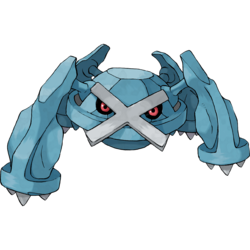

2. Probopass

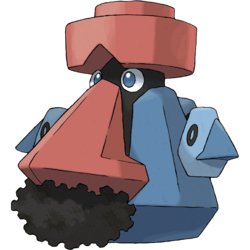

3. Glastrier

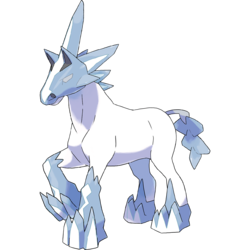

4. Golem

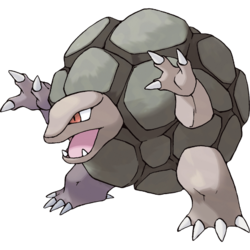

5. Heatran

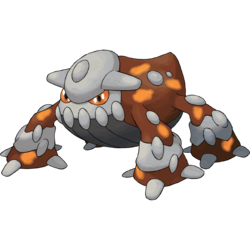

#### 8. Existem pokémons predominantemente machos ou fêmeas?

In [60]:
query = """
WITH subquery AS(
    SELECT
        CASE
            WHEN (female_ratio = 0 AND male_ratio = 0) THEN 'Genderless'
            WHEN female_ratio = 0 THEN 'Male'
            WHEN male_ratio = 0 THEN 'Female'
            WHEN male_ratio > female_ratio THEN 'Pred. Male'
            WHEN female_ratio > male_ratio THEN 'Pred. Female'
            ELSE 'Balanced' END AS gender
    FROM pokedex
    WHERE alt_form IS NULL
    )
    
SELECT gender, COUNT(*) AS count
FROM subquery
GROUP BY gender
ORDER BY count DESC
"""

ps.sqldf(query)

,gender,count
0,Balanced,623
1,Pred. Male,150
2,Genderless,144
3,Female,35
4,Male,29
5,Pred. Female,27


Parece que a maioria dos pokémons tem proporções iguais de gênero, e vários simplesmente não possuem um. Enquanto algumas espécies tem apenas um. Curioso...

#### 9. Que pokémon seria mais provável de vencer uma corrida?


Um bom critério seria selecionar os maiores valores da coluna `spe`.

In [54]:
query = """
SELECT
    pokemon_name,
    alt_form,
    spe
FROM pokedex
ORDER BY spe DESC
LIMIT 5
"""
ps.sqldf(query)

,pokemon_name,alt_form,spe
0,Regieleki,None,200
1,Deoxys,Speed,180
2,Ninjask,None,160
3,Pheromosa,None,151
4,Alakazam,Mega,150


1. Regieleki

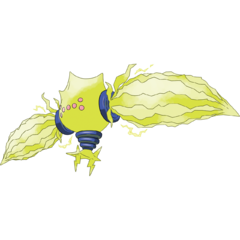

2. Speed Deoxys

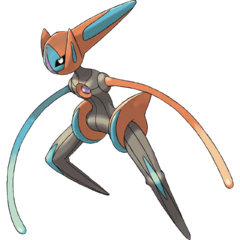

3. Ninjask

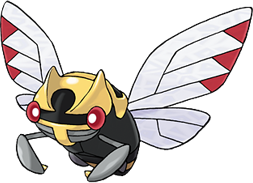

4. Pheromosa

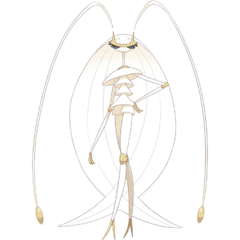

5. Mega Alakazam

<img src=https://archives.bulbagarden.net/media/upload/a/ac/0065Alakazam-Mega.png width="240">> 

#### 10. Quantos pokémons começam com a letra 'X'?


In [55]:
query = """
SELECT
    pokemon_name
FROM pokedex
WHERE pokemon_name LIKE 'X%'
"""
ps.sqldf(query)

,pokemon_name
0,Xatu
1,Xerneas
2,Xurkitree


1. Xatu

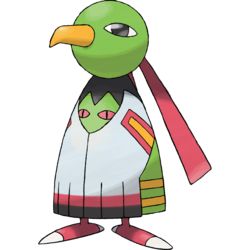

2. Xerneas

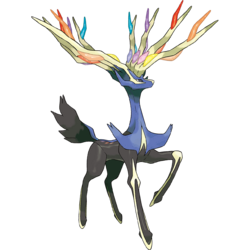

3. Xurkitree

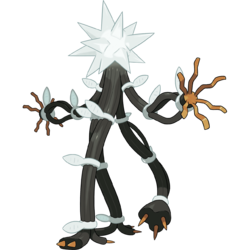

Apenas três pokémons iniciam seus nomes com 'X'. Foi até uma surpresa, na verdade...